# P3: OpenStreetMap Data Case Study. Dubai and Abu-Dhabi.

### 0. Code Resources

##### 0.1. Code Library

In [1]:
# IRkernel::installspec(name = 'ir33', displayname = 'R 3.3')

In [2]:
library(devtools)

In [3]:
library(rmarkdown)

In [18]:
library(dplyr)

In [19]:
library(ggplot2)

In [142]:
# install.packages('sqldf')

In [133]:
# install.packages('mongo-r-driver')

In [20]:
# install.packages('rstudio')

In [21]:
# install.packages('ggforce')

In [22]:
# install.packages("rgeos") 

In [23]:
# install.packages("mapview")

In [24]:
# library(ggforce)

In [25]:
# library(rgeos)

In [26]:
# library(mapview)

In [27]:
# library(rstudio)

In [28]:
library(ggthemes)

In [29]:
library(RColorBrewer)

In [30]:
library(plotly)

In [31]:
library(dygraphs)

In [32]:
library(leaflet)

In [44]:
library(highcharter)

In [45]:
library(rbokeh)

In [46]:
library(maps)

In [47]:
library(maptools)

In [48]:
library(ggmap)

In [49]:
library(osmar)

In [50]:
library(R2HTML)

In [51]:
library(sp)

In [52]:
library(mongolite)

In [56]:
library(RMongo)

In [54]:
library(jsonlite)

In [140]:
library(RSQLite)

In [143]:
library(sqldf)

##### 0.2. Useful links

https://wiki.openstreetmap.org/wiki/OSM_XML

https://www.datacamp.com/community/tutorials/r-data-import-tutorial#gs.jUE2UHw

http://www2.uaem.mx/r-mirror/web/packages/osmar/osmar.pdf

https://www.researchgate.net/publication/274740645_Harnessing_open_street_map_data_with_R_and_QGIS

https://cran.r-project.org/web/packages/mongolite/vignettes/intro.html

https://journal.r-project.org/archive/2013-1/eugster-schlesinger.pdf


http://www.joyofdata.de/blog/mongodb-state-of-the-r-rmongodb/

https://edzer.github.io/sp/

https://cran.r-project.org/web/packages/ggmap/ggmap.pdf

https://media.readthedocs.org/pdf/jupyter-notebook/latest/jupyter-notebook.pdf

https://journal.r-project.org/archive/2013-1/kahle-wickham.pdf

https://www.r-bloggers.com/r-and-mongodb/

https://cran.r-project.org/web/packages/mongolite/mongolite.pdf

https://www.r-bloggers.com/r-and-sqlite-part-1/

### 1. Map Area

#### 1.1.  The map
I have chosed the map sector of the dynamically developing area in the UAE.

For displaying the area I have used the  package "ggmap" and the coordinates of this area in dubai_abu-dhabi.osm.

In [60]:
options(repr.plot.width = 10, repr.plot.height = 10)

In [258]:
dubai_gmap <- get_map(location = c(lon = 55.2708, lat = 25.2048), source = "google", maptype = "hybrid", zoom = 8)

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.2048,55.2708&zoom=8&size=640x640&scale=2&maptype=hybrid&language=en-EN&sensor=false


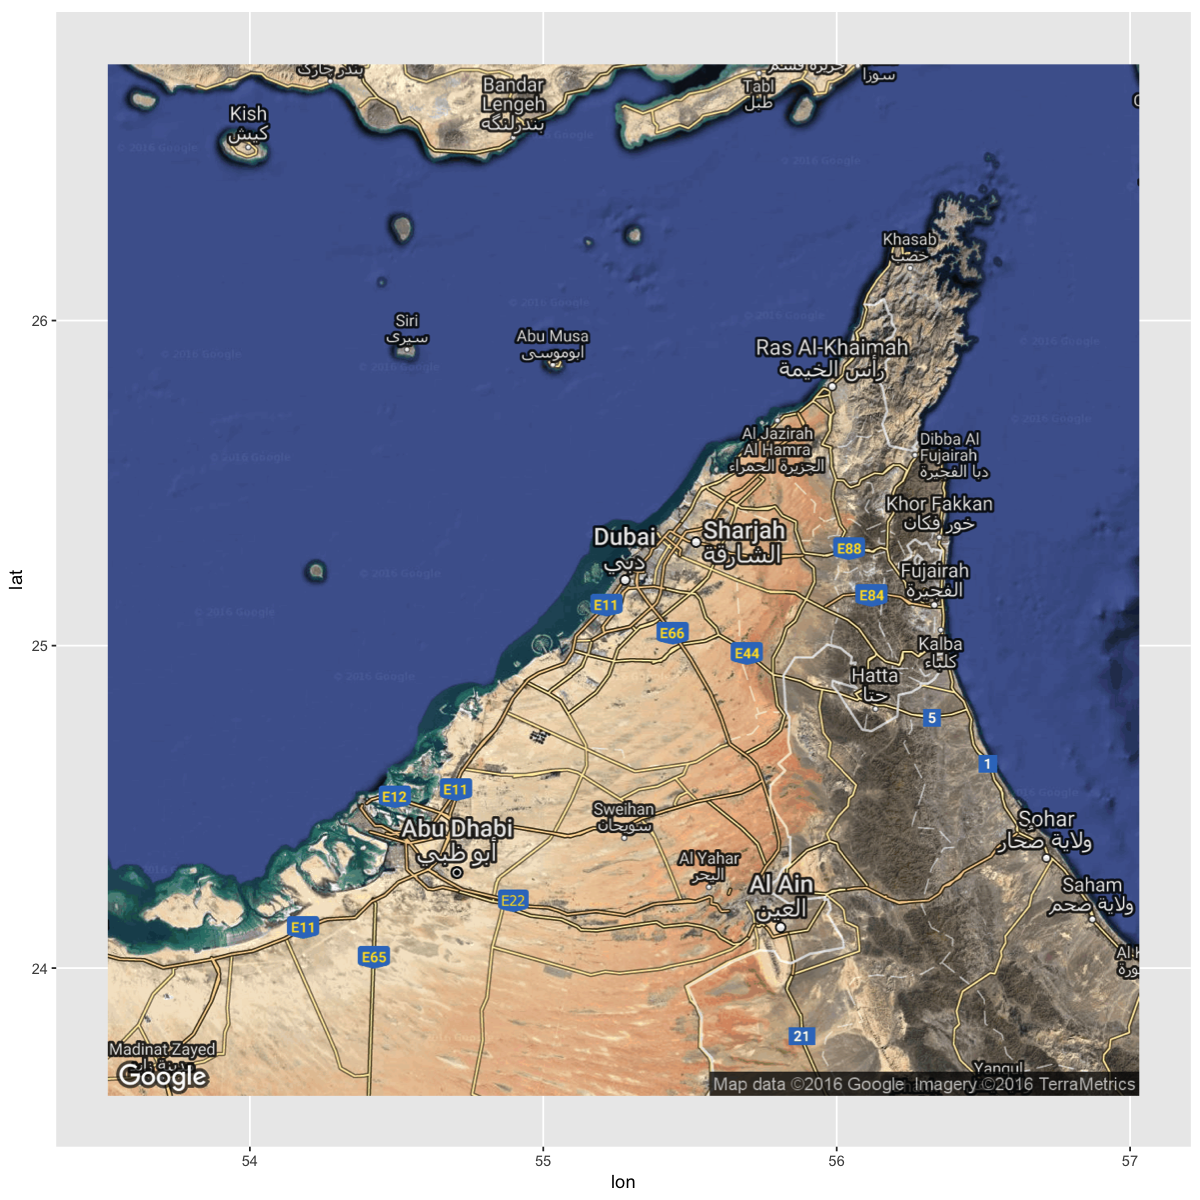

In [259]:
ggmap(dubai_gmap, extent = "normal")

In [261]:
dubai_osmmap <- get_map(location = "dubai", zoom = 8, source = "osm")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=dubai&zoom=8&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=dubai&sensor=false


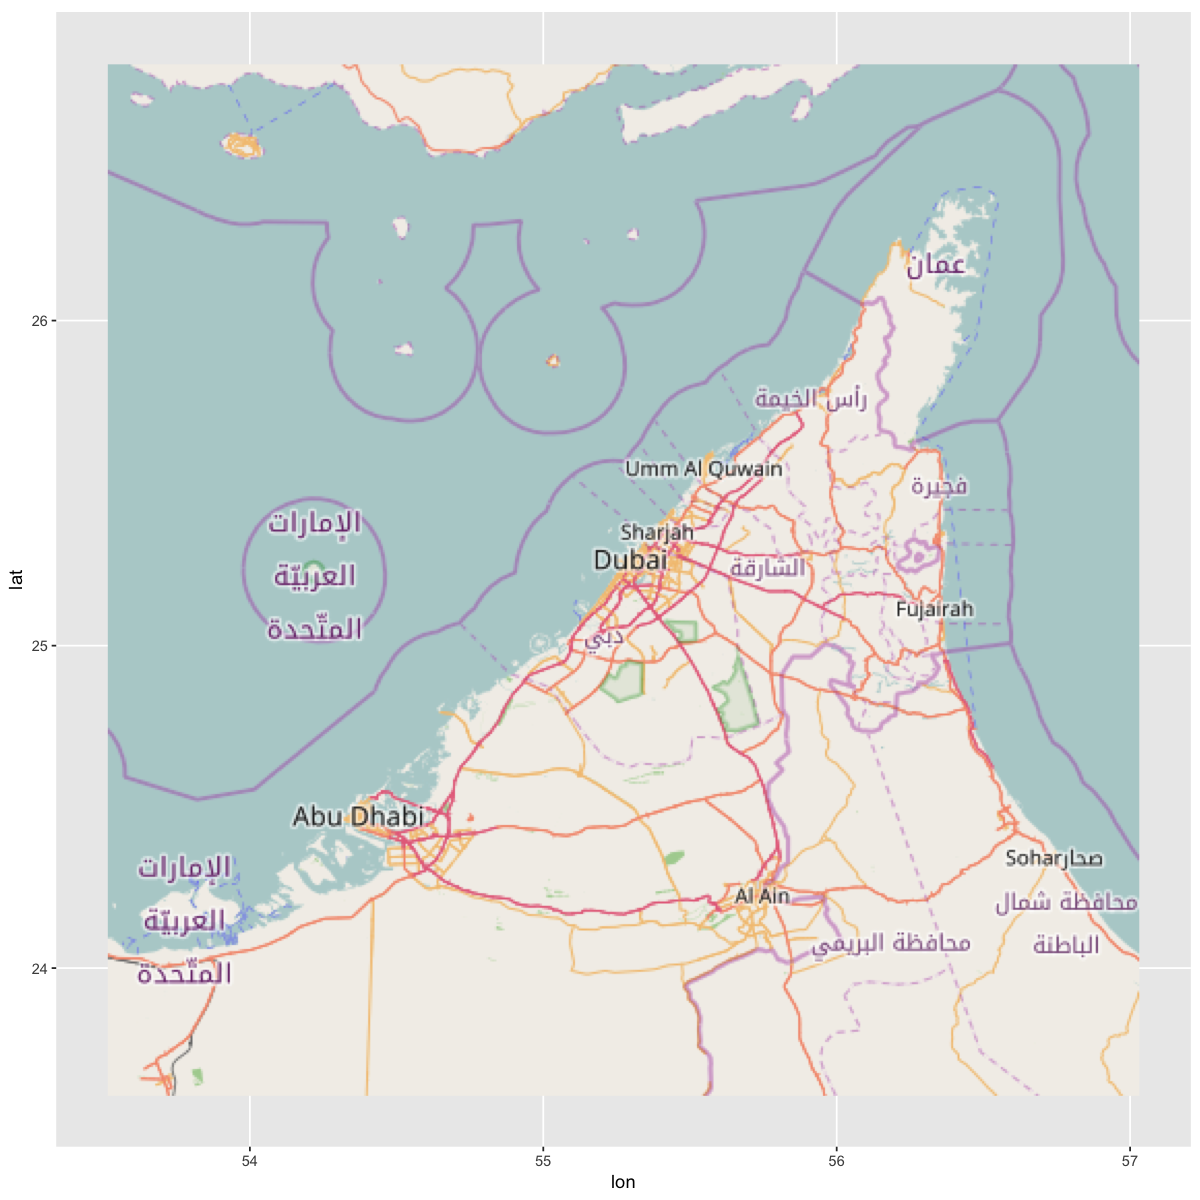

In [262]:
ggmap(dubai_osmmap, extent = "normal")

#### bounds: minlat="23.7350" minlon="53.5800" maxlat="26.5390" maxlon="56.8870"

#### 1.2 Extract with osmar R
There are several ways to extract geodata. One of them is to do this with this R code cell.

This set of commands allows us to upload the data using the coordinates.

In [65]:
src <- osmsource_api()

In [66]:
smallbox <- center_bbox(55.2708, 25.2048, 1000, 1000)
sdubai <- get_osm(smallbox, source = src)

In [67]:
str(sdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	1486 obs. of  9 variables:
  .. ..$ id       : num [1:1486] 9.40e+07 1.12e+09 1.12e+09 1.12e+09 1.12e+09 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:1486], format: "2010-12-02 13:32:04" "2012-08-14 22:09:32" ...
  .. ..$ version  : num [1:1486] 5 2 1 2 2 2 2 2 2 3 ...
  .. ..$ changeset: num [1:1486] 6514690 12732672 7103923 12732672 12732672 ...
  .. ..$ user     : Factor w/ 48 levels "Alex111X","andi9876",..: 39 42 42 42 42 42 42 42 42 42 ...
  .. ..$ uid      : Factor w/ 48 levels "10927","114220",..: 1 15 15 15 15 15 15 15 15 15 ...
  .. ..$ lat      : num [1:1486] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:1486] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	218 obs. of  3 variables:
  .. ..$ id: num [1:218] 6.04e+08 6.04e+08 6.04e+08 6.04e+08 6.04e+08 ...
  .. ..$ k : Factor w/ 36 levels "addr:city","addr:housenumber",..: 26 16 31 36 15 25 13

In [68]:
bigbox <- center_bbox(55.2708, 25.2048, 6000, 6000)
bdubai <- get_osm(bigbox, source = src)

In [69]:
str(bdubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	46649 obs. of  9 variables:
  .. ..$ id       : num [1:46649] 30593914 30593915 31473923 31474006 31474005 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:46649], format: "2016-08-19 09:40:14" "2010-12-14 12:40:14" ...
  .. ..$ version  : num [1:46649] 19 4 2 5 5 5 2 5 2 2 ...
  .. ..$ changeset: num [1:46649] 41552017 6657884 6514101 7313392 7313392 ...
  .. ..$ user     : Factor w/ 207 levels "08xavstj","12Katniss",..: 64 177 177 188 188 188 177 177 177 82 ...
  .. ..$ uid      : Factor w/ 207 levels "1069176","10927",..: 60 2 2 41 41 41 2 2 2 81 ...
  .. ..$ lat      : num [1:46649] 25.2 25.2 25.2 25.2 25.2 ...
  .. ..$ lon      : num [1:46649] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	1852 obs. of  3 variables:
  .. ..$ id: num [1:1852] 9.11e+07 9.50e+07 9.50e+07 2.60e+08 2.81e+08 ...
  .. ..$ k : Factor w/ 100 levels "access","addr:city",..: 35 35 71 11 8

In [70]:
node_tags <- sort(unique(bdubai$nodes$tags$k))
print(node_tags)

  [1] access                          addr:city                      
  [3] addr:country                    addr:flats                     
  [5] addr:housename                  addr:housenumber               
  [7] addr:place                      addr:postcode                  
  [9] addr:street                     aeroway                        
 [11] amenity                         barrier                        
 [13] bench                           bicycle                        
 [15] building                        bus                            
 [17] capacity                        construction                   
 [19] contact:instagram               country                        
 [21] covered                         crossing                       
 [23] cuisine                         delivery                       
 [25] description                     diplomatic                     
 [27] direction                       drive_in                       
 [29] drive_through 

In [71]:
way_tags <- sort(unique(bdubai$ways$tags$k))
print(way_tags)

  [1] _building:height         _building:levels         access                  
  [4] access:note              addr:city                addr:country            
  [7] addr:housename           addr:housenumber         addr:postcode           
 [10] addr:street              addr:suburb              admin_level             
 [13] aerialway                aeroway                  alt_name                
 [16] alt_name:hu              alt_name2                alt_old_name:hu         
 [19] amenity                  area                     atm                     
 [22] barrier                  bicycle                  boundary                
 [25] bridge                   bridge:structure         building                
 [28] building:levels          building:material        building:part           
 [31] bus                      cables                   capacity                
 [34] construction             contact:email            contact:facebook        
 [37] contact:fax           

In [72]:
users <- unique(bdubai$nodes$attrs$user)
print(users)

  [1] FresRe                   Skywave                  Tommy                   
  [4] hno2                     Cali42                   bigbug21                
  [7] mkarau                   DerCut                   msghmr                  
 [10] greecemapper             rehan727                 GeoGrafiker             
 [13] GRagib                   Veit                     Rudy355                 
 [16] ratrun                   sunmarke                 13 digits               
 [19] Tiramon                  Daniel Damianov          mx18                    
 [22] tiger_old                lorenzo23622             eXmajor                 
 [25] vamros                   Jennings Anderson        OSMF Redaction Account  
 [28] Binu Soman Punalur       Кирилл Игоревич          Sharat Sreedharan Nair  
 [31] Maxoo60                  csdf                     Calibrator              
 [34] robgeb                   Otti38                   mawueth                 
 [37] SEVEN                 

In [73]:
uids <- sort(unique(bdubai$nodes$attrs$uid))
length(uids)

[1] 207

#### 1.3 Plotting with osmar R

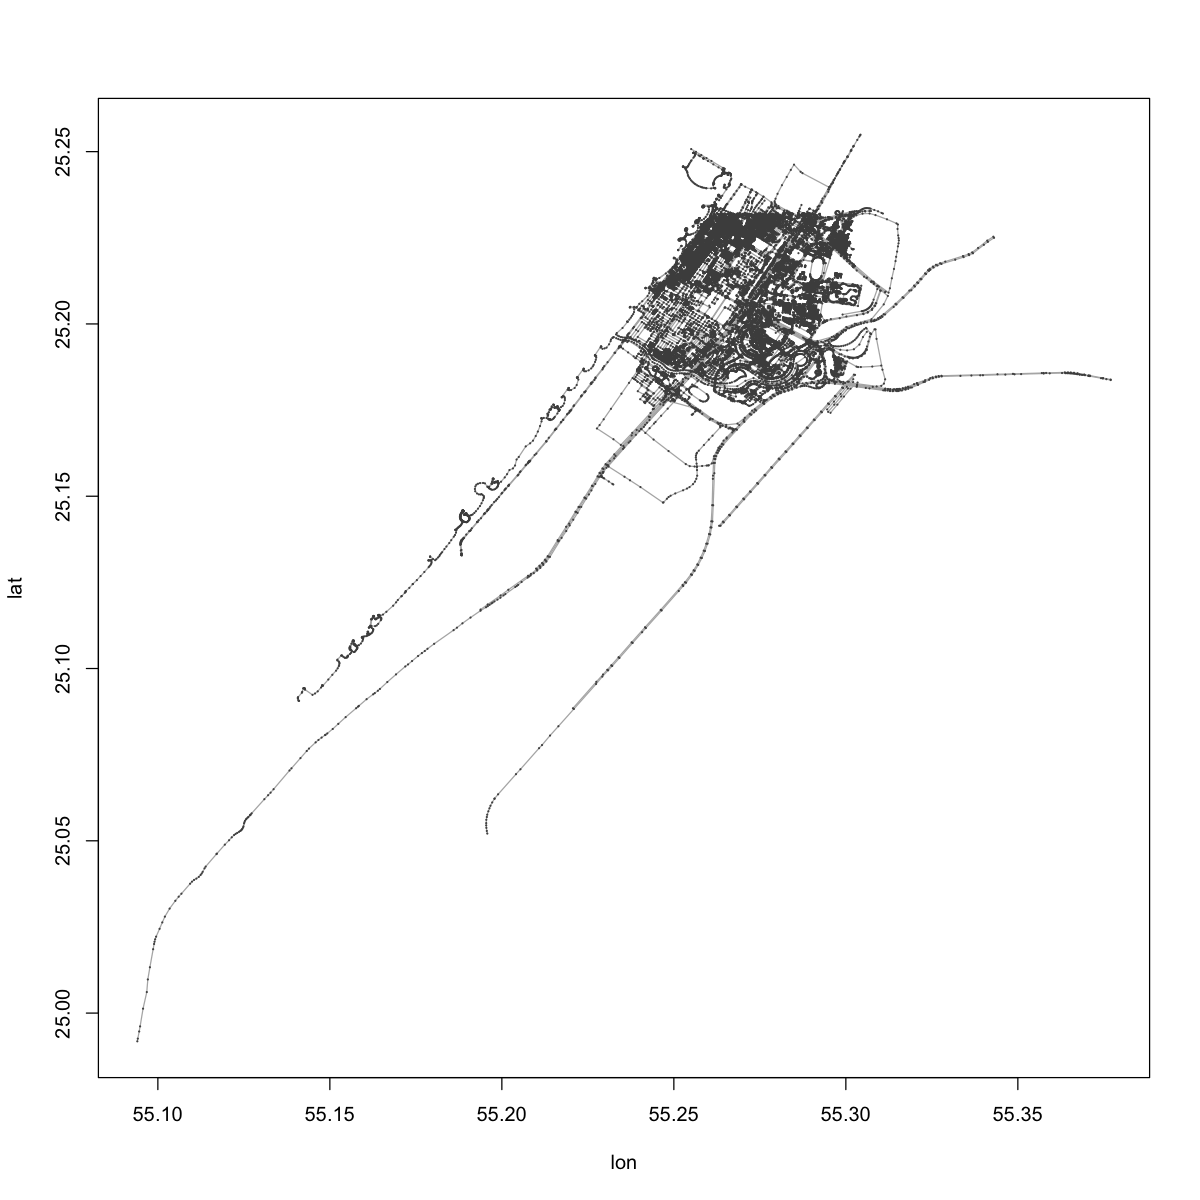

In [74]:
plot(bdubai)

In [75]:
tss <- find(sdubai, node(tags(v == "traffic_signals")))
ts_sdubai <- subset(sdubai, node_ids = tss)

In [76]:
bss <- find(sdubai, node(tags(v %agrep% "busstop")))
bs_sdubai <- subset(sdubai, node_ids = bss)

In [77]:
hws <- find(sdubai, way(tags(k == "highway")))
hws <- find_down(sdubai, way(hws))

In [78]:
hw_sdubai <- subset(sdubai, ids = hws)

In [79]:
tus <- find(sdubai, way(tags(k == "tunnel")))
tus <- find_down(sdubai, way(tus))

In [80]:
tu_sdubai <- subset(sdubai, ids = tus)

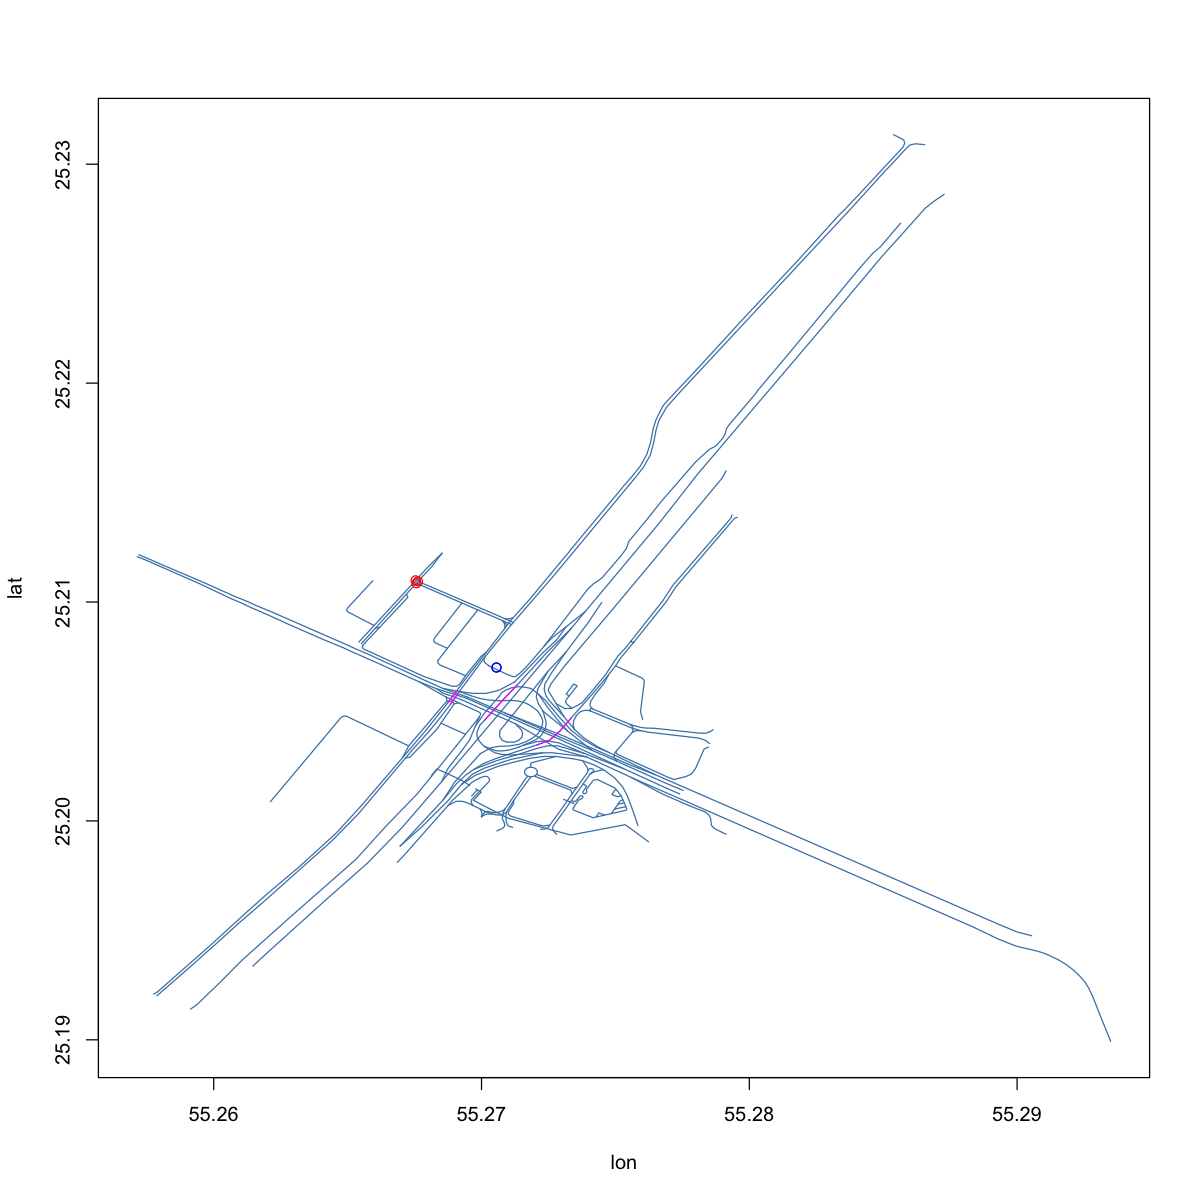

In [81]:
plot_ways(hw_sdubai, col = "steelblue")
plot_ways(tu_sdubai, add = TRUE, col = "magenta")
plot_nodes(ts_sdubai, add = TRUE, col = "red")
plot_nodes(bs_sdubai, add = TRUE, col = "blue")

In [82]:
ts <- find(bdubai, node(tags(v == "traffic_signals")))
ts_dubai <- subset(bdubai, node_ids = ts)

In [83]:
bs <- find(bdubai, node(tags(v %agrep% "busstop")))
bs_dubai <- subset(bdubai, node_ids = bs)

In [84]:
hw <- find(bdubai, way(tags(k == "highway")))
hw <- find_down(bdubai, way(hw))

In [85]:
hw_dubai <- subset(bdubai, ids = hw)

In [86]:
tu <- find(bdubai, way(tags(k == "tunnel")))
tu <- find_down(bdubai, way(tu))

In [87]:
tu_dubai <- subset(bdubai, ids = tu)

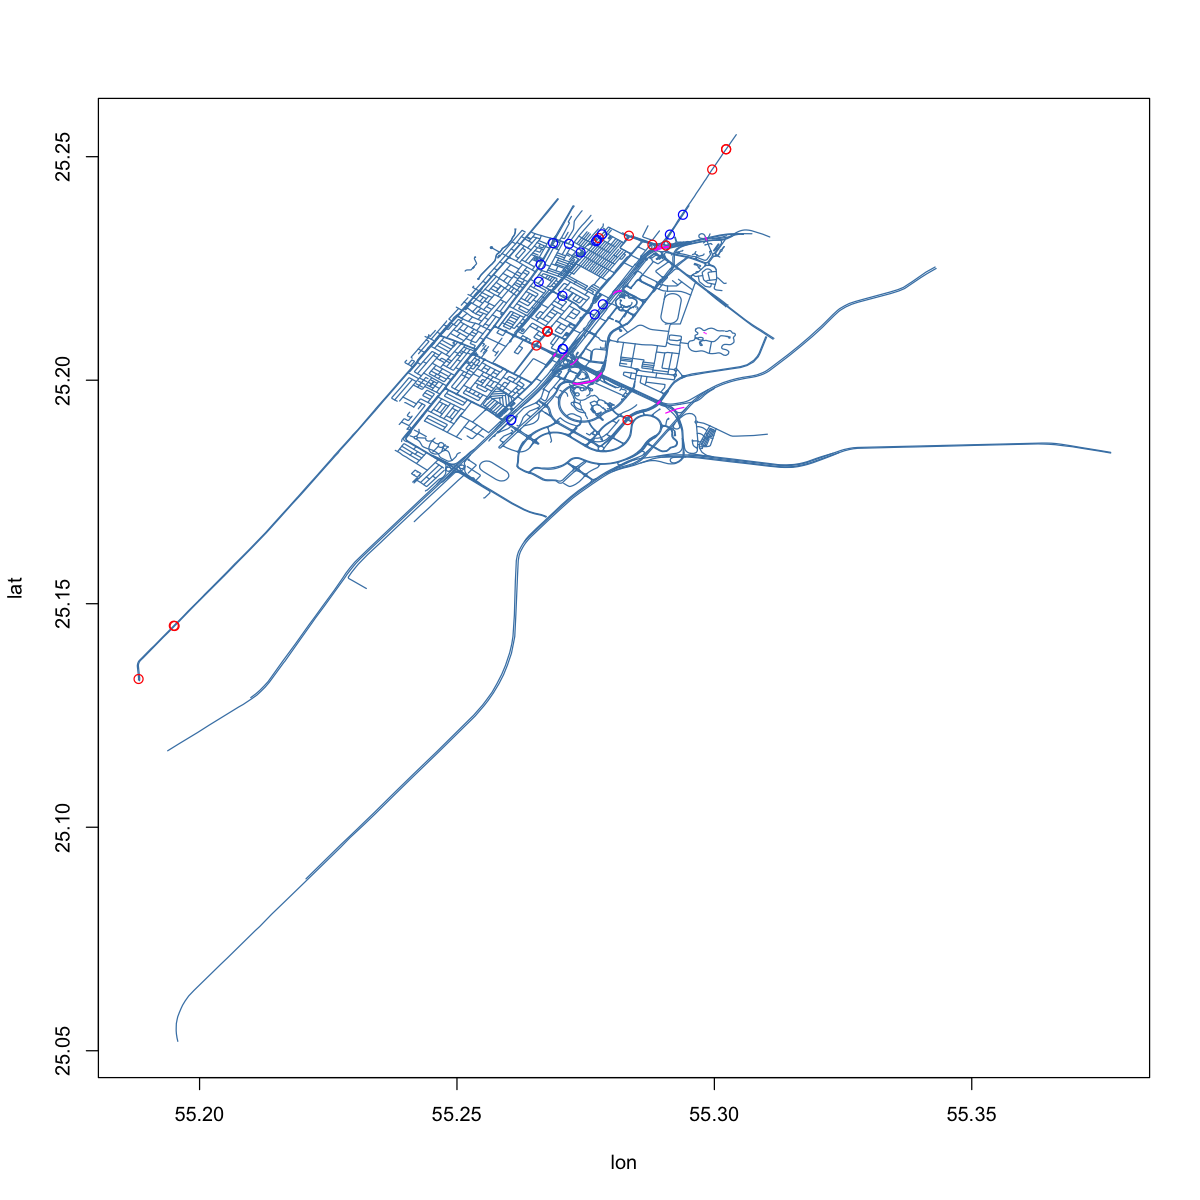

In [88]:
plot_ways(hw_dubai, col = "steelblue")
plot_ways(tu_dubai, add = TRUE, col = "magenta")
plot_nodes(ts_dubai, add = TRUE, col = "red")
plot_nodes(bs_dubai, add = TRUE, col = "blue")

In [89]:
brewer.pal.info["Set3",]$maxcolors

[1] 12

In [90]:
bg <- find(bdubai, way(tags(k == "building")))
bg <- find_down(bdubai, way(bg))

In [91]:
bg_dubai <- subset(bdubai, ids = bg)

In [92]:
bg_poly <- as_sp(bg_dubai, "polygons")

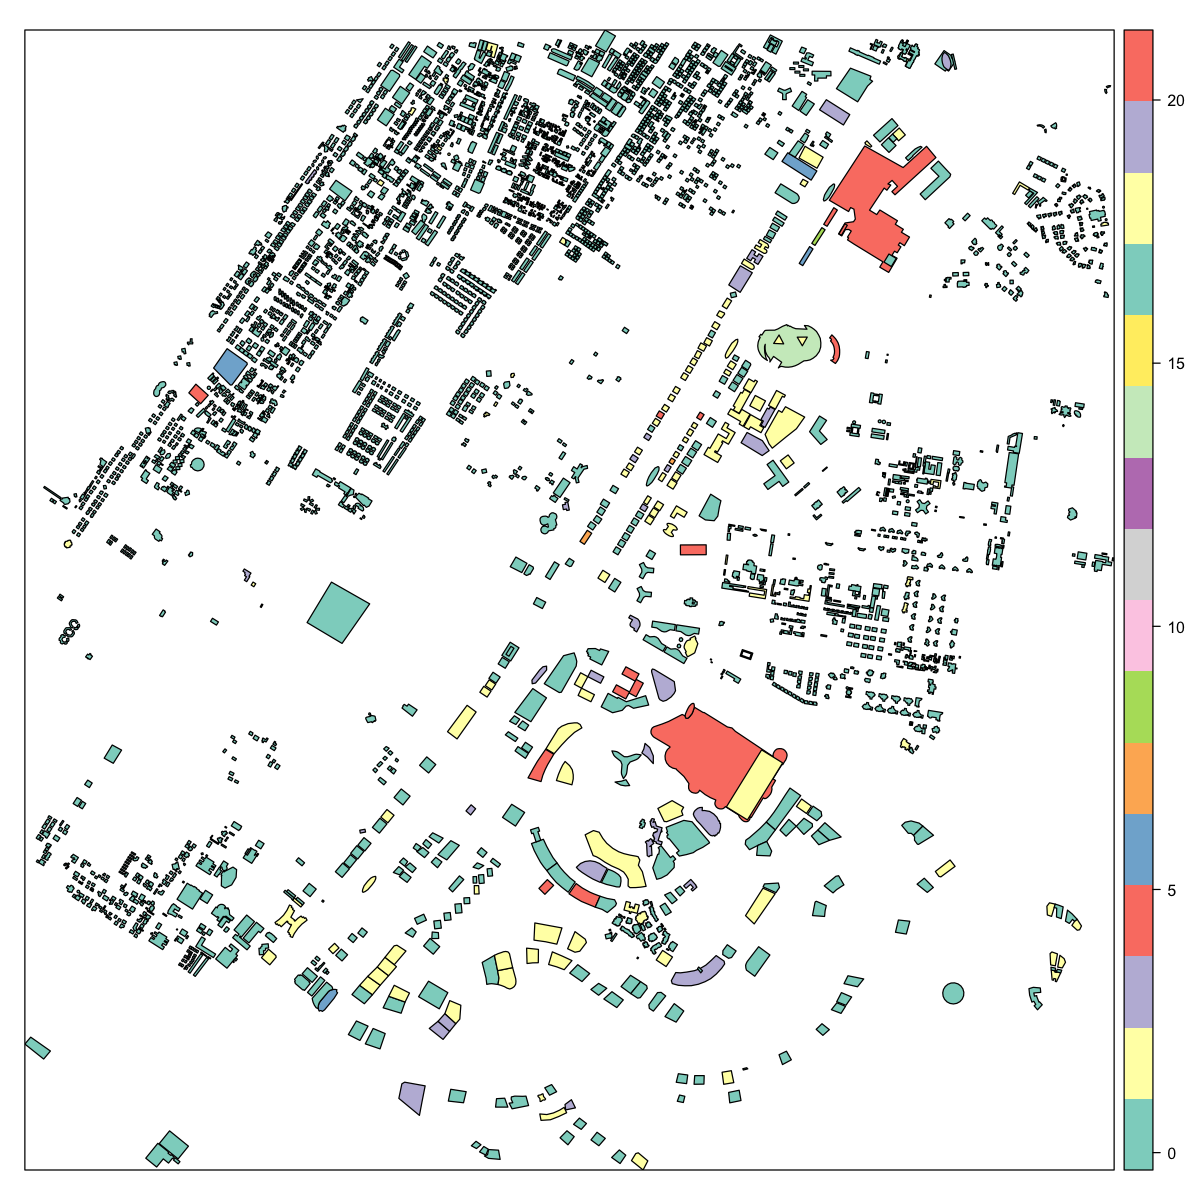

In [93]:
spplot(bg_poly, col.regions=brewer.pal(12, "Set3"), c("version"))

In [94]:
# bus <- find(bdubai, relation(tags(v == "bus")))
# bus_dubai <- lapply(bus, function(i) { as_sp(get_osm(relation(i), full = TRUE), "lines") })

In [95]:
bs_points <- as_sp(bs_dubai, "points")

In [96]:
hw_line <- as_sp(hw_dubai, "lines")

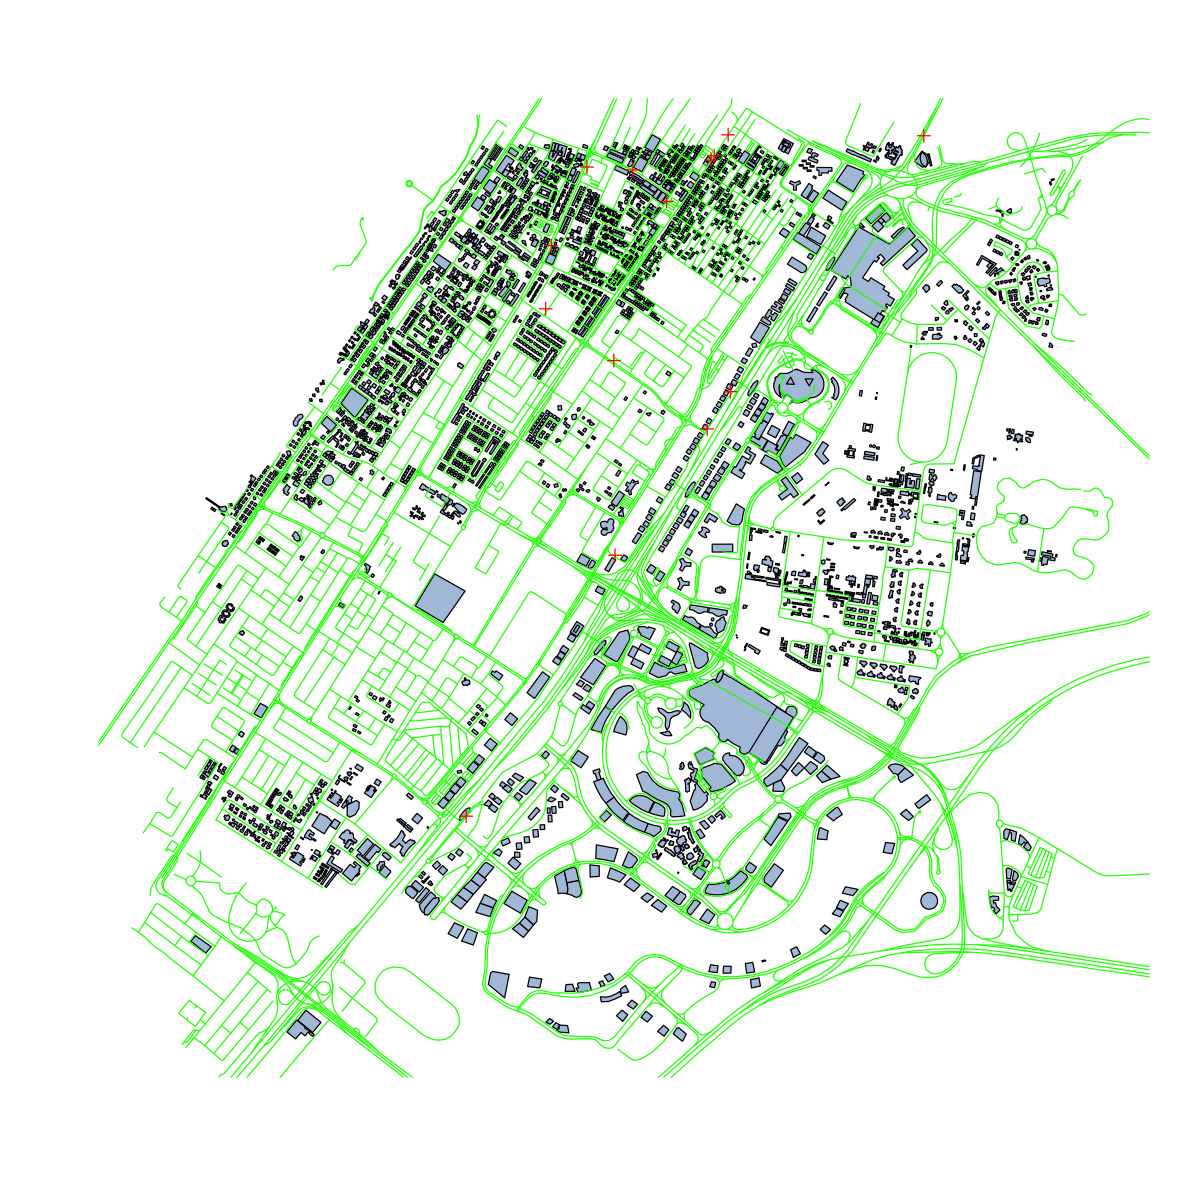

In [97]:
plot(bg_poly, col = "lightsteelblue")
plot(hw_line, add = TRUE, col = "green")
plot(bs_points, add = TRUE, col = "red")
# for ( i in seq(along = bus_dubai) ) { plot(bus[[i]], add = TRUE, col = "blue") }

#### 1.4. Size of downloaded files.

In [98]:
file.size("dubai_abu-dhabi.osm")

[1] 394382598

In [99]:
file.size("dubai_abu-dhabi.osm.json")

[1] 458155339

In [100]:
file.size("nodes.csv")

[1] 154228820

In [101]:
file.size("nodes_tags.csv")

[1] 3912302

In [102]:
file.size("ways_nodes.csv")

[1] 55135540

In [103]:
file.size("ways.csv")

[1] 13797779

In [104]:
file.size("ways_tags.csv")

[1] 13383027

In [108]:
# dubai1 <- get_osm(complete_file(), source=source1)

In [107]:
dubai2 <- osmar:::get_osm_data.osmfile(source1)

#### 1.5 Osmar sources

In [109]:
dubai2[5]

[1] "\t<node id=\"21133779\" lat=\"25.148038\" lon=\"55.3862105\" version=\"2\" timestamp=\"2011-02-15T02:24:42Z\" changeset=\"7291467\" uid=\"18885\" user=\"Tommy\"/>"

In [110]:
line5 <- as_osmar(xmlParse(dubai2[5]))
line5

osmar object
1 nodes, 0 ways, 0 relations

In [106]:
get_osm(node(21133779), source = osmsource_api())

osmar object
1 nodes, 0 ways, 0 relations

### 2. CSV & SQL

#### 2.1. From osmar to csv files

In [ ]:
write.csv(dubai1$nodes$attrs, file = "rnodes.csv")
file.size("rnodes.csv")

In [ ]:
write.csv(dubai1$nodes$tags, file = "rnodes_tags.csv")
file.size("rnodes_tags.csv")

In [ ]:
write.csv(dubai1$ways$attrs, file = "rways.csv")
file.size("rways.csv")

In [ ]:
write.csv(dubai1$ways$tags, file = "rways_tags.csv")
file.size("rways_tags.csv")

In [ ]:
write.csv(dubai1$ways$refs, file = "rways_refs.csv")
file.size("rways_refs.csv")

In [ ]:
write.csv(dubai1$relations$attrs, file = "rrelations.csv")
file.size("rrelations.csv")

In [ ]:
write.csv(dubai1$relation$tags, file = "rrelations_tags.csv")
file.size("rrelations_tags.csv")

In [ ]:
write.csv(dubai1$relation$refs, file = "rrelations_refs.csv")
file.size("rrelations_refs.csv")

### 2.2. From csv files to SQL

In [186]:
# Variant 1

In [198]:
sqlite <- dbDriver("SQLite")

In [199]:
dubai_abu_dhabi <- dbConnect(sqlite,"dubai_abu_dhabi.sqlite3")

In [200]:
nodes <- read.csv('nodes.csv')
nodes_tags <- read.csv('nodes_tags.csv')
ways <- read.csv('ways.csv')
ways_tags <- read.csv('ways_tags.csv')
ways_nodes <- read.csv('ways_nodes.csv')

In [201]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'nodes', value = nodes, row.names = FALSE)

[1] TRUE

In [202]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'nodes_tags', value = nodes_tags, row.names = FALSE)

[1] TRUE

In [203]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'ways', value = ways, row.names = FALSE)

[1] TRUE

In [204]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'ways_tags', value = ways_tags, row.names = FALSE)

[1] TRUE

In [205]:
dbWriteTable(conn = dubai_abu_dhabi, name = 'ways_nodes', value = ways_nodes, row.names = FALSE)

[1] TRUE

In [206]:
dbListTables(dubai_abu_dhabi)

[1] "nodes"      "nodes_tags" "ways"       "ways_nodes" "ways_tags"

In [207]:
dbListFields(dubai_abu_dhabi, 'nodes')

[1] "id"        "lat"       "lon"       "user"      "uid"       "version"  
[7] "changeset" "timestamp"

In [208]:
dbListFields(dubai_abu_dhabi, 'nodes_tags')

[1] "id"    "key"   "value" "type"

In [209]:
dbListFields(dubai_abu_dhabi, 'ways')

[1] "id"        "user"      "uid"       "version"   "changeset" "timestamp"

In [210]:
dbListFields(dubai_abu_dhabi, 'ways_tags')

[1] "id"    "key"   "value" "type"

In [211]:
dbListFields(dubai_abu_dhabi, 'ways_nodes')

[1] "id"       "node_id"  "position"

In [212]:
dbDisconnect(dubai_abu_dhabi)

[1] TRUE

In [156]:
# Variant 2

In [231]:
sqldf("attach dubai_abu_dhabi as new")

NULL

In [243]:
# read.csv.sql("nodes.csv", sql = "create table nodes as select * from file", dbname = "dubai_abu_dhabi")

In [244]:
sqldf("select * from nodes limit 3", dbname = "dubai_abu_dhabi")

id       lat      lon      user  uid   version changeset timestamp           
1 21133776 25.17528 55.39664 Tommy 18885 3        7291467  2011-02-15T02:24:49Z
2 21133779 25.14804 55.38621 Tommy 18885 2        7291467  2011-02-15T02:24:42Z
3 21133785 25.19667 55.30909 Tommy 18885 9       12645525  2012-08-07T13:29:47Z

In [245]:
# read.csv.sql("nodes_tags.csv", sql = "create table nodes_tags as select * from file", dbname = "dubai_abu_dhabi")

In [246]:
sqldf("select * from nodes_tags limit 3", dbname = "dubai_abu_dhabi")

id       key      value           type   
1 21136186 crossing island          regular
2 21136186 highway  traffic_signals regular
3 21161907 operator Eppco           regular

In [247]:
# read.csv.sql("ways.csv", sql = "create table ways as select * from file", dbname = "dubai_abu_dhabi")

In [248]:
sqldf("select * from ways limit 3", dbname = "dubai_abu_dhabi")

id      user     uid     version changeset timestamp           
1 4009554 rehan727 2952340 25      42505170  2016-09-28T21:02:31Z
2 4334711 4b696d   1420318 21      28096059  2015-01-12T19:49:12Z
3 4340534 wk2      1808544 18      18943947  2013-11-16T22:28:53Z

In [249]:
# read.csv.sql("ways_tags.csv", sql = "create table ways_tags as select * from file", dbname = "dubai_abu_dhabi")

In [250]:
sqldf("select * from ways_tags limit 3", dbname = "dubai_abu_dhabi")

id      key     value               type   
1 4009554 bridge  yes                 regular
2 4009554 lanes   no|no|no|no|yes|yes hgv    
3 4009554 highway motorway            regular

In [251]:
# read.csv.sql("ways_nodes.csv", sql = "create table ways_nodes as select * from file", dbname = "dubai_abu_dhabi")

In [252]:
sqldf("select * from ways_nodes limit 3", dbname = "dubai_abu_dhabi")

id      node_id  position
1 4009554 90031463 0       
2 4009554 90028252 1       
3 4009554 21133804 2

In [255]:
query001 = "SELECT COUNT(*) FROM nodes;"
query002 = "SELECT COUNT(*) FROM ways;"

In [256]:
sqldf(query001)

COUNT(*)
1 1890178

In [257]:
sqldf(query002)

COUNT(*)
1 234327

### 3. JSON & Mongo DB

In [ ]:
file.size("dubai_abu-dhabi.osm.json")

In [124]:
# Variant 1
mg1 <- mongoDbConnect('test')

character(0)

In [106]:
source1 <- osmsource_file("dubai_abu-dhabi.osm")

In [134]:
# stream_in(file("dubai_abu-dhabi.osm.json"), handler = function(df){m$insert(df)})

In [ ]:
file.size("nodes.sv")

In [74]:
get_osm(node(21133779), source = osmsource_api())

osmar object
1 nodes, 0 ways, 0 relations

In [73]:
dubai2 <- osmar:::get_osm_data.osmfile(source1)

In [75]:
line5 <- as_osmar(xmlParse(dubai2[5]))
line5

osmar object
1 nodes, 0 ways, 0 relations

### 2. CSV & SQL

In [ ]:
write.csv(dubai1$nodes$attrs, file = "rnodes.csv")
file.size("rnodes.csv")

In [ ]:
write.csv(dubai1$nodes$tags, file = "rnodes_tags.csv")
file.size("rnodes_tags.csv")

In [ ]:
write.csv(dubai1$ways$attrs, file = "rways.csv")
file.size("rways.csv")

In [ ]:
write.csv(dubai1$ways$tags, file = "rways_tags.csv")
file.size("rways_tags.csv")

In [ ]:
write.csv(dubai1$ways$refs, file = "rways_refs.csv")
file.size("rways_refs.csv")

In [ ]:
write.csv(dubai1$relations$attrs, file = "rrelations.csv")
file.size("rrelations.csv")

In [ ]:
write.csv(dubai1$relations$attrs, file = "rrelations_tags.csv")
file.size("rrelations_tags.csv")

In [ ]:
write.csv(dubai1$relation$refs, file = "rrelations_refs.csv")
file.size("rrelations_refs.csv")

### 3.SQL

### 4. JSON & Mongo DB

In [78]:
# mongod from terminal

In [79]:
m <- mongo("openstreetmap", verbose = FALSE)

In [80]:
# stream_in(file("dubai_abu-dhabi.osm.json"), handler = function(df){m$insert(df)})

In [81]:
m$count()

[1] 2124505

In [82]:
m$info()

$name
[1] "openstreetmap"

$stats
$stats$ns
[1] "test.openstreetmap"

$stats$count
[1] 2124505

$stats$size
[1] 502488587

$stats$avgObjSize
[1] 236

$stats$storageSize
[1] 155140096

$stats$capped
[1] FALSE

$stats$wiredTiger
$stats$wiredTiger$metadata
$stats$wiredTiger$metadata$formatVersion
[1] 1


$stats$wiredTiger$creationString
[1] "allocation_size=4KB,app_metadata=(formatVersion=1),block_allocation=best,block_compressor=snappy,cache_resident=0,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=0,extractor=,format=btree,huffman_key=,huffman_value=,immutable=0,internal_item_max=0,internal_key_max=0,internal_key_truncate=,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=),lsm=(auto_throttle=,bloom=,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=0,chunk_count_limit=0,chunk_max=5GB,chunk_size=10MB,merge_max=15,merge_min=0),memory_page_max=10m,os_cache_dirty_max=0,os_cache_max=0,prefix_compression=0,prefix_compression_min=4,source=,split_deepen_min_child=0,split_deepen_per_child=0,split_pct=90,type=file,value_format=u"

$stats$wiredTiger$type
[1] "file"

$stats$wiredTiger$uri
[1] "statistics:table:collection-2--5321892968811513580"

$stats$wiredTiger$LSM
$stats$wiredTiger$LSM$`bloom filter false positives`
[1] 0

$stats$wiredTiger$LSM$`bloom filter hits`
[1] 0

$stats$wiredTiger$LSM$`bloom filter misses`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages evicted from cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages read into cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filters in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`chunks in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`highest merge generation in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`queries that could have benefited from a Bloom filter that did not exist`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM checkpoint throttle`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM merge throttle`
[1] 0

$stats$wiredTiger$LSM$`total size of bloom filters`
[1] 0


$stats$wiredTiger$`block-manager`
$stats$wiredTiger$`block-manager`$`allocations requiring file extension`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks allocated`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks freed`
[1] 0

$stats$wiredTiger$`block-manager`$`checkpoint size`
[1] 155156480

$stats$wiredTiger$`block-manager`$`file allocation unit size`
[1] 4096

$stats$wiredTiger$`block-manager`$`file bytes available for reuse`
[1] 36864

$stats$wiredTiger$`block-manager`$`file magic number`
[1] 120897

$stats$wiredTiger$`block-manager`$`file major version number`
[1] 1

$stats$wiredTiger$`block-manager`$`file size in bytes`
[1] 155140096

$stats$wiredTiger$`block-manager`$`minor version number`
[1] 0


$stats$wiredTiger$btree
$stats$wiredTiger$btree$`btree checkpoint generation`
[1] 0

$stats$wiredTiger$btree$`column-store fixed-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`column-store internal pages`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size RLE encoded values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size deleted values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`fixed-record size`
[1] 0

$stats$wiredTiger$btree$`maximum internal page key size`
[1] 368

$stats$wiredTiger$btree$`maximum internal page size`
[1] 4096

$stats$wiredTiger$btree$`maximum leaf page key size`
[1] 2867

$stats$wiredTiger$btree$`maximum leaf page size`
[1] 32768

$stats$wiredTiger$btree$`maximum leaf page value size`
[1] 67108864

$stats$wiredTiger$btree$`maximum tree depth`
[1] 0

$stats$wiredTiger$btree$`number of key/value pairs`
[1] 0

$stats$wiredTiger$btree$`overflow pages`
[1] 0

$stats$wiredTiger$btree$`pages rewritten by compaction`
[1] 0

$stats$wiredTiger$btree$`row-store internal pages`
[1] 0

$stats$wiredTiger$btree$`row-store leaf pages`
[1] 0


$stats$wiredTiger$cache
$stats$wiredTiger$cache$`bytes

In [ ]:
file.size("nodes_tags.sv")

In [ ]:
file.size("ways.sv")

In [ ]:
file.size("Ways_tags.sv")

In [ ]:
file.size("ways_nodes.sv")

In [139]:
source1 <- osmsource_file("dubai_abu-dhabi.osm")

In [ ]:
dubai1 <- get_osm(complete_file(), source=source1)

In [140]:
dubai2 <- osmar:::get_osm_data.osmfile(source1)

Warning message in file(con, "r"):
“не могу открыть файл 'dubai_abu-dhabi.osm': No such file or directory”

ERROR: Error in file(con, "r"): не могу открыть соединение


In [118]:
get_osm(node(21133779), source = osmsource_api())

osmar object
1 nodes, 0 ways, 0 relations

In [ ]:
dubai2[5]

In [ ]:
line5 <- as_osmar(xmlParse(dubai2[5]))
line5

### 3. CSV & SQL

#### 3.1. From osmar to csv files

In [ ]:
write.csv(dubai1$nodes$attrs, file = "rnodes.csv")
file.size("rnodes.csv")

In [ ]:
write.csv(dubai1$nodes$tags, file = "rnodes_tags.csv")
file.size("rnodes_tags.csv")

In [ ]:
write.csv(dubai1$ways$attrs, file = "rways.csv")
file.size("rways.csv")

In [ ]:
write.csv(dubai1$ways$tags, file = "rways_tags.csv")
file.size("rways_tags.csv")

In [ ]:
write.csv(dubai1$ways$refs, file = "rways_refs.csv")
file.size("rways_refs.csv")

In [ ]:
write.csv(dubai1$relations$attrs, file = "rrelations.csv")
file.size("rrelations.csv")

In [ ]:
write.csv(dubai1$relation$tags, file = "rrelations_tags.csv")
file.size("rrelations_tags.csv")

In [ ]:
write.csv(dubai1$relation$refs, file = "rrelations_refs.csv")
file.size("rrelations_refs.csv")

#### 3.2. From csv files to SQL

### 4. JSON & Mongo DB

In [122]:
# mongod from terminal

In [123]:
m <- mongo("openstreetmap", verbose = FALSE)

In [124]:
# stream_in(file("dubai_abu-dhabi.osm.json"), handler = function(df){m$insert(df)})

In [125]:
m$count()

[1] 2124505

In [138]:
m$info()

$name
[1] "openstreetmap"

$stats
$stats$ns
[1] "test.openstreetmap"

$stats$count
[1] 2124505

$stats$size
[1] 502488587

$stats$avgObjSize
[1] 236

$stats$storageSize
[1] 155140096

$stats$capped
[1] FALSE

$stats$wiredTiger
$stats$wiredTiger$metadata
$stats$wiredTiger$metadata$formatVersion
[1] 1


$stats$wiredTiger$creationString
[1] "allocation_size=4KB,app_metadata=(formatVersion=1),block_allocation=best,block_compressor=snappy,cache_resident=0,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=0,extractor=,format=btree,huffman_key=,huffman_value=,immutable=0,internal_item_max=0,internal_key_max=0,internal_key_truncate=,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=),lsm=(auto_throttle=,bloom=,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=0,chunk_count_limit=0,chunk_max=5GB,chunk_size=10MB,merge_max=15,merge_min=0),memory_page_max=10m,os_cache_dirty_max=0,os_cache_max=0,prefix_compression=0,prefix_compression_min=4,source=,split_deepen_min_child=0,split_deepen_per_child=0,split_pct=90,type=file,value_format=u"

$stats$wiredTiger$type
[1] "file"

$stats$wiredTiger$uri
[1] "statistics:table:collection-2--5321892968811513580"

$stats$wiredTiger$LSM
$stats$wiredTiger$LSM$`bloom filter false positives`
[1] 0

$stats$wiredTiger$LSM$`bloom filter hits`
[1] 0

$stats$wiredTiger$LSM$`bloom filter misses`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages evicted from cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages read into cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filters in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`chunks in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`highest merge generation in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`queries that could have benefited from a Bloom filter that did not exist`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM checkpoint throttle`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM merge throttle`
[1] 0

$stats$wiredTiger$LSM$`total size of bloom filters`
[1] 0


$stats$wiredTiger$`block-manager`
$stats$wiredTiger$`block-manager`$`allocations requiring file extension`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks allocated`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks freed`
[1] 0

$stats$wiredTiger$`block-manager`$`checkpoint size`
[1] 155156480

$stats$wiredTiger$`block-manager`$`file allocation unit size`
[1] 4096

$stats$wiredTiger$`block-manager`$`file bytes available for reuse`
[1] 36864

$stats$wiredTiger$`block-manager`$`file magic number`
[1] 120897

$stats$wiredTiger$`block-manager`$`file major version number`
[1] 1

$stats$wiredTiger$`block-manager`$`file size in bytes`
[1] 155140096

$stats$wiredTiger$`block-manager`$`minor version number`
[1] 0


$stats$wiredTiger$btree
$stats$wiredTiger$btree$`btree checkpoint generation`
[1] 13

$stats$wiredTiger$btree$`column-store fixed-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`column-store internal pages`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size RLE encoded values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size deleted values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`fixed-record size`
[1] 0

$stats$wiredTiger$btree$`maximum internal page key size`
[1] 368

$stats$wiredTiger$btree$`maximum internal page size`
[1] 4096

$stats$wiredTiger$btree$`maximum leaf page key size`
[1] 2867

$stats$wiredTiger$btree$`maximum leaf page size`
[1] 32768

$stats$wiredTiger$btree$`maximum leaf page value size`
[1] 67108864

$stats$wiredTiger$btree$`maximum tree depth`
[1] 4

$stats$wiredTiger$btree$`number of key/value pairs`
[1] 0

$stats$wiredTiger$btree$`overflow pages`
[1] 0

$stats$wiredTiger$btree$`pages rewritten by compaction`
[1] 0

$stats$wiredTiger$btree$`row-store internal pages`
[1] 0

$stats$wiredTiger$btree$`row-store leaf pages`
[1] 0


$stats$wiredTiger$cache
$stats$wiredTiger$cache$`byte

In [104]:
file.size("ways.csv")

[1] 13797779

In [105]:
file.size("ways_tags.csv")

[1] 13383027

In [ ]:
dubai1 <- get_osm(complete_file(), source=source1)

In [ ]:
#### 3.1. From osmar to csv files

In [111]:
# mongod from terminal

In [130]:
# Variant 2
m <- mongo("openstreetmap", verbose = FALSE)

In [135]:
m$count()

[1] 2124505

In [136]:
m$info()

$name
[1] "openstreetmap"

$stats
$stats$ns
[1] "test.openstreetmap"

$stats$count
[1] 2124505

$stats$size
[1] 502488587

$stats$avgObjSize
[1] 236

$stats$storageSize
[1] 155140096

$stats$capped
[1] FALSE

$stats$wiredTiger
$stats$wiredTiger$metadata
$stats$wiredTiger$metadata$formatVersion
[1] 1


$stats$wiredTiger$creationString
[1] "allocation_size=4KB,app_metadata=(formatVersion=1),block_allocation=best,block_compressor=snappy,cache_resident=0,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=0,extractor=,format=btree,huffman_key=,huffman_value=,immutable=0,internal_item_max=0,internal_key_max=0,internal_key_truncate=,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=),lsm=(auto_throttle=,bloom=,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=0,chunk_count_limit=0,chunk_max=5GB,chunk_size=10MB,merge_max=15,merge_min=0),memory_page_max=10m,os_cache_dirty_max=0,os_cache_max=0,prefix_compression=0,prefix_compression_min=4,source=,split_deepen_min_child=0,split_deepen_per_child=0,split_pct=90,type=file,value_format=u"

$stats$wiredTiger$type
[1] "file"

$stats$wiredTiger$uri
[1] "statistics:table:collection-2--5321892968811513580"

$stats$wiredTiger$LSM
$stats$wiredTiger$LSM$`bloom filter false positives`
[1] 0

$stats$wiredTiger$LSM$`bloom filter hits`
[1] 0

$stats$wiredTiger$LSM$`bloom filter misses`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages evicted from cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filter pages read into cache`
[1] 0

$stats$wiredTiger$LSM$`bloom filters in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`chunks in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`highest merge generation in the LSM tree`
[1] 0

$stats$wiredTiger$LSM$`queries that could have benefited from a Bloom filter that did not exist`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM checkpoint throttle`
[1] 0

$stats$wiredTiger$LSM$`sleep for LSM merge throttle`
[1] 0

$stats$wiredTiger$LSM$`total size of bloom filters`
[1] 0


$stats$wiredTiger$`block-manager`
$stats$wiredTiger$`block-manager`$`allocations requiring file extension`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks allocated`
[1] 0

$stats$wiredTiger$`block-manager`$`blocks freed`
[1] 0

$stats$wiredTiger$`block-manager`$`checkpoint size`
[1] 155156480

$stats$wiredTiger$`block-manager`$`file allocation unit size`
[1] 4096

$stats$wiredTiger$`block-manager`$`file bytes available for reuse`
[1] 36864

$stats$wiredTiger$`block-manager`$`file magic number`
[1] 120897

$stats$wiredTiger$`block-manager`$`file major version number`
[1] 1

$stats$wiredTiger$`block-manager`$`file size in bytes`
[1] 155140096

$stats$wiredTiger$`block-manager`$`minor version number`
[1] 0


$stats$wiredTiger$btree
$stats$wiredTiger$btree$`btree checkpoint generation`
[1] 5

$stats$wiredTiger$btree$`column-store fixed-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`column-store internal pages`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size RLE encoded values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size deleted values`
[1] 0

$stats$wiredTiger$btree$`column-store variable-size leaf pages`
[1] 0

$stats$wiredTiger$btree$`fixed-record size`
[1] 0

$stats$wiredTiger$btree$`maximum internal page key size`
[1] 368

$stats$wiredTiger$btree$`maximum internal page size`
[1] 4096

$stats$wiredTiger$btree$`maximum leaf page key size`
[1] 2867

$stats$wiredTiger$btree$`maximum leaf page size`
[1] 32768

$stats$wiredTiger$btree$`maximum leaf page value size`
[1] 67108864

$stats$wiredTiger$btree$`maximum tree depth`
[1] 0

$stats$wiredTiger$btree$`number of key/value pairs`
[1] 0

$stats$wiredTiger$btree$`overflow pages`
[1] 0

$stats$wiredTiger$btree$`pages rewritten by compaction`
[1] 0

$stats$wiredTiger$btree$`row-store internal pages`
[1] 0

$stats$wiredTiger$btree$`row-store leaf pages`
[1] 0


$stats$wiredTiger$cache
$stats$wiredTiger$cache$`bytes